<a href="https://colab.research.google.com/github/VaideswarReddy/Credit_card_default_prediction/blob/main/Vaideswar_Reddy_Team_3_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Prediction of Credit card defaulters 
In today’s world most people have a credit card by the time they turn eighteen years old. It is normal to swipe a credit card to buy your children Christmas, because credit card companies now offer rewards where an individual receives money back or maybe even a discount flight. People used to not want to buy their children’s Christmas on credit, but rather work a little harder and save up the money to buy it.

So now we know what a credit card is. Now let's see one of problems faced by companies who provide credit cards. Yes it is the peolpe who do not clear off the credit card debt aka **credit card defaulters**.

***Here we will tackle this problem by predicting people who will or might fall into the category of credit card defaulters.***

#Exploratory Data Analysis

In [5]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble

from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Copy of default of credit card clients.xls',header = 1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df = df.rename(columns={'LIMIT_BAL':'credit_limit','SEX':'gender','PAY_0':'pp_sep','PAY_2':'pp_aug','PAY_3':'pp_july','PAY_4':'pp_june','PAY_5':'pp_may','PAY_6':'pp_april','BILL_AMT1':'sep_bill','BILL_AMT2':'aug_bill','BILL_AMT3':'july_bill','BILL_AMT4':'june_bill','BILL_AMT5':'may_bill','BILL_AMT6':'april_bill','PAY_AMT1':'sep_paid_amt','PAY_AMT2':'aug_paid_amt','PAY_AMT3':'july_paid_amt','PAY_AMT4':'june_paid_amt','PAY_AMT5':'may_paid_amt','PAY_AMT6':'april_paid_amt'})

In [ ]:
df.head()

,ID,credit_limit,gender,EDUCATION,MARRIAGE,AGE,pp_sep,pp_aug,pp_july,pp_june,pp_may,pp_april,sep_bill,aug_bill,july_bill,june_bill,may_bill,april_bill,sep_paid_amt,aug_paid_amt,july_paid_amt,june_paid_amt,may_paid_amt,april_paid_amt,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.credit_limit.value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: credit_limit, Length: 81, dtype: int64

###Gender

In [ ]:
df.gender.value_counts()

2    18112
1    11888
Name: gender, dtype: int64

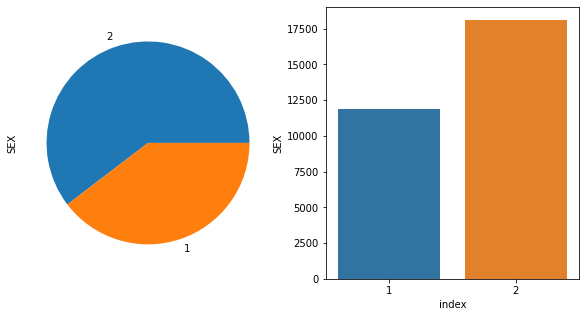

<Figure size 936x576 with 0 Axes>

In [7]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
Day_df=df['SEX'].value_counts().reset_index()
plt.figure(figsize=(13,8))
df['SEX'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='SEX',data=Day_df,ax = axes[1])

In [62]:

# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['HAS_DEF'],columns = df2[column_name], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

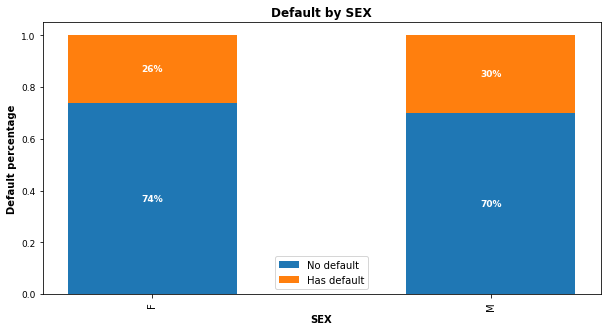

In [ ]:
create_stacked_bar('SEX')

In [ ]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [8]:
def chg(col):
  x=col
  if (col==0) or (col==5) or (col==6):
    x=4
  return x
df['EDUCATION']=df['EDUCATION'].apply(chg)

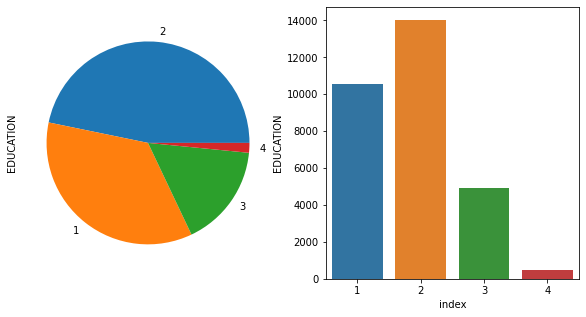

<Figure size 936x576 with 0 Axes>

In [10]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
Day_df=df['EDUCATION'].value_counts().reset_index()
plt.figure(figsize=(13,8))
df['EDUCATION'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='EDUCATION',data=Day_df,ax = axes[1])

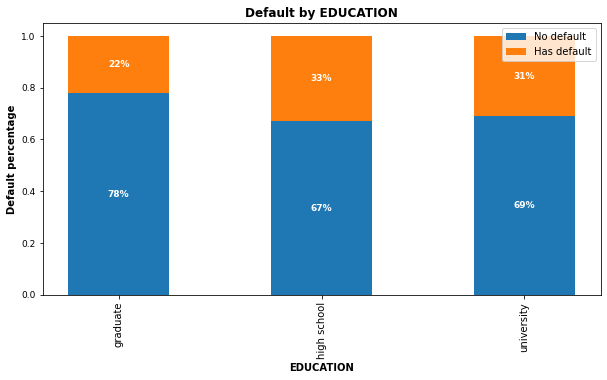

In [ ]:
create_stacked_bar('EDUCATION')

In [ ]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

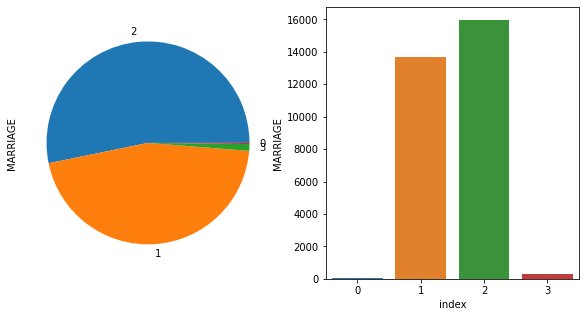

<Figure size 936x576 with 0 Axes>

In [11]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
Day_df=df['MARRIAGE'].value_counts().reset_index()
plt.figure(figsize=(13,8))
df['MARRIAGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='MARRIAGE',data=Day_df,ax = axes[1])

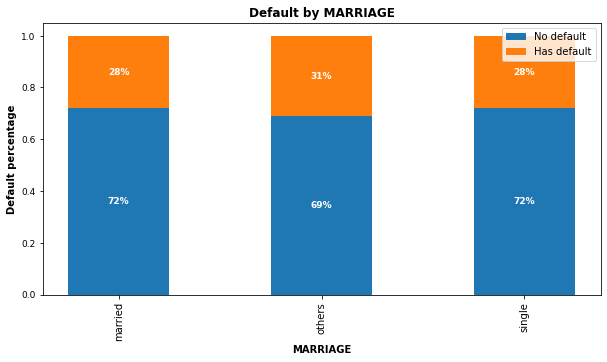

In [ ]:
create_stacked_bar('MARRIAGE')

In [ ]:
df.AGE.value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

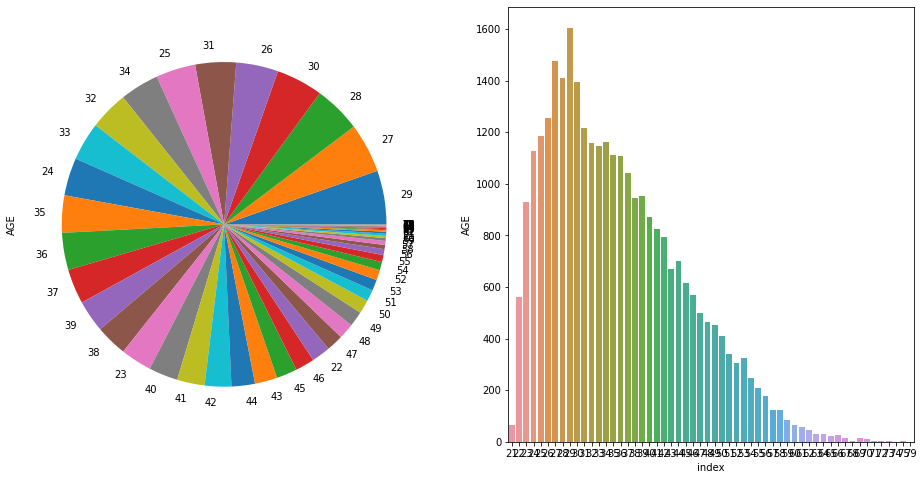

In [12]:
fig, axes = plt.subplots(ncols=2,figsize=(16,8))
Day_df=df['AGE'].value_counts().reset_index()
df['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='AGE',data=Day_df,ax = axes[1],orient='v')


In [ ]:
bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df2['AGE'] = pd.cut(df2['AGE'],bins=bins, labels=labels,right=False)

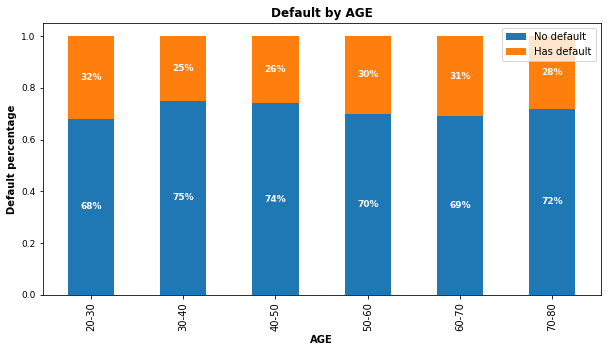

In [ ]:
create_stacked_bar('AGE')

First we will find all the anomalies or outliers using the box plot and get some idea what's going on in our dataset.

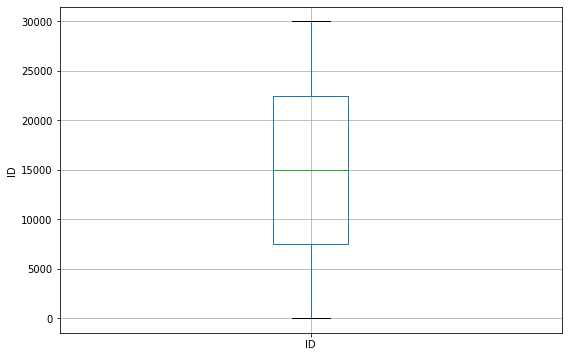

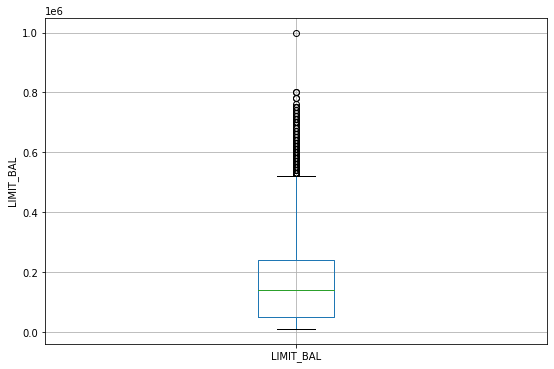

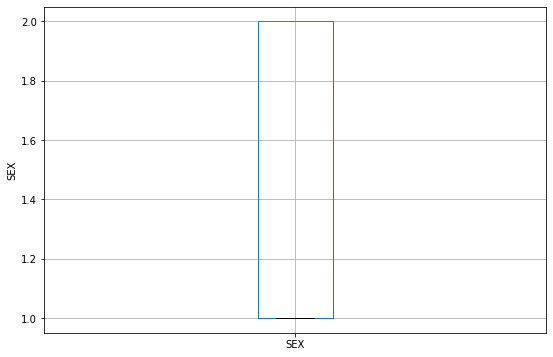

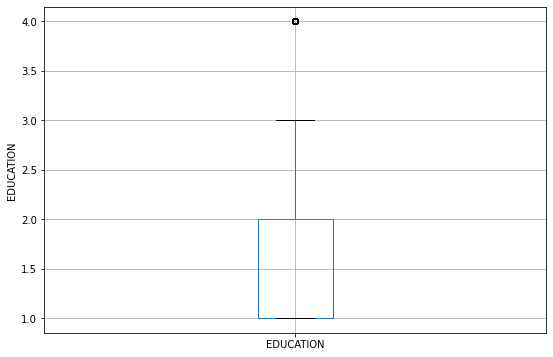

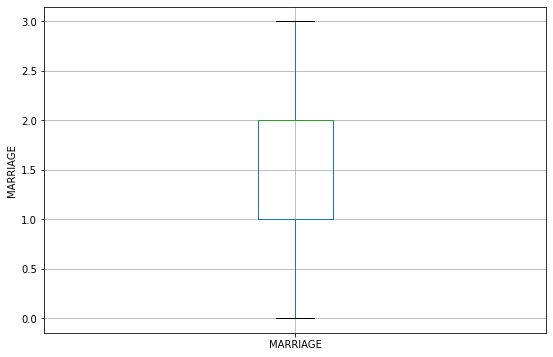

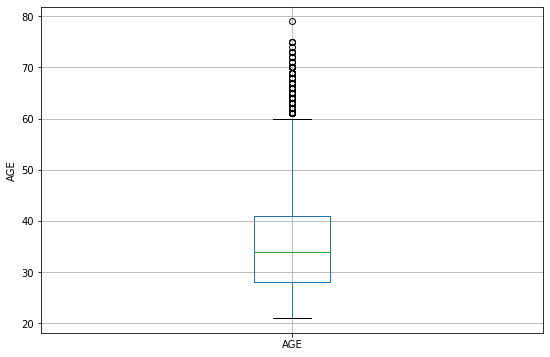

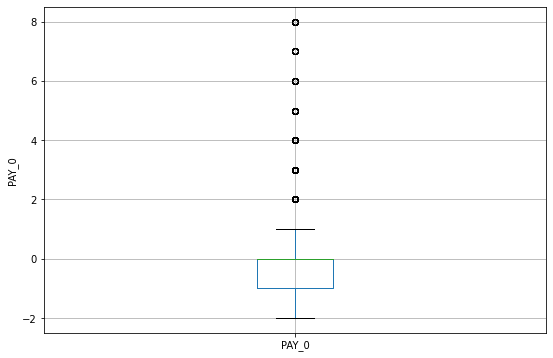

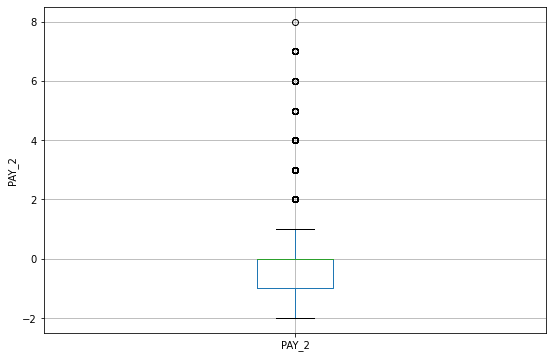

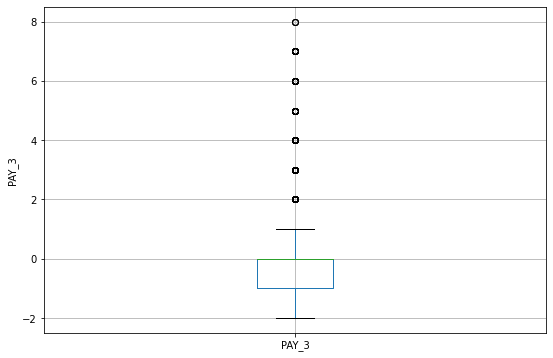

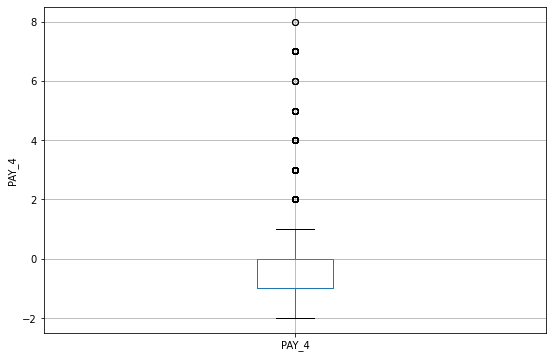

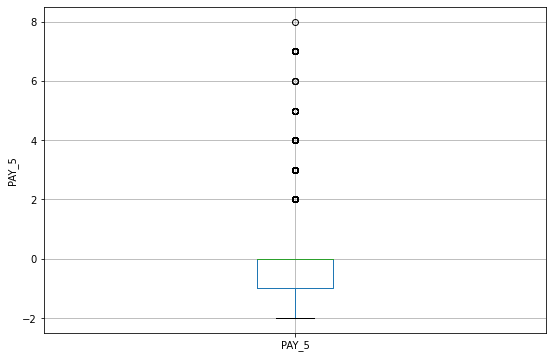

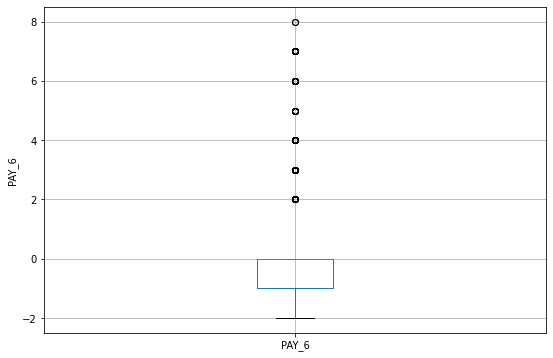

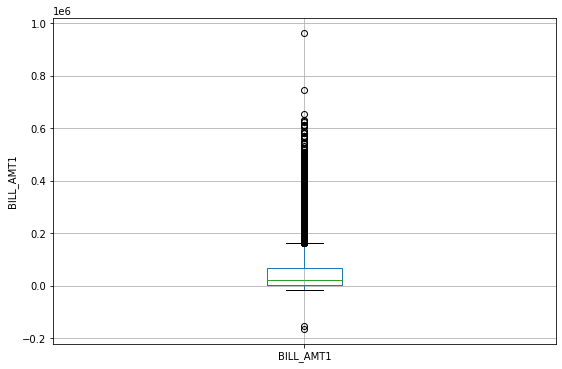

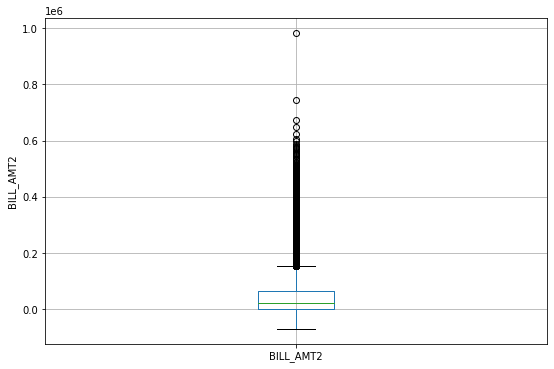

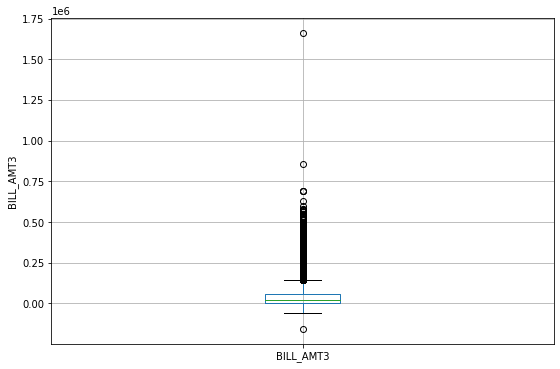

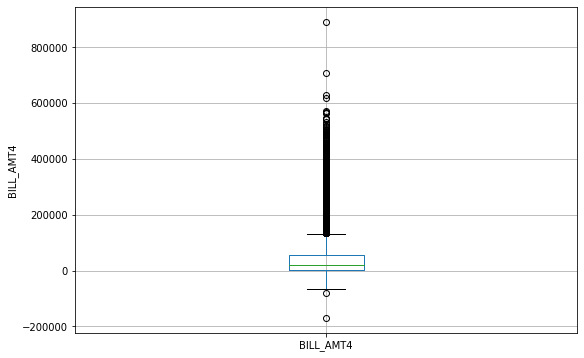

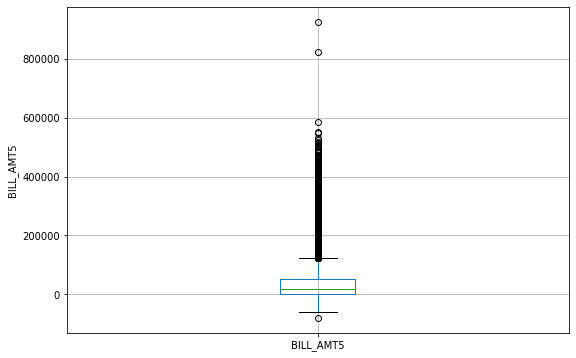

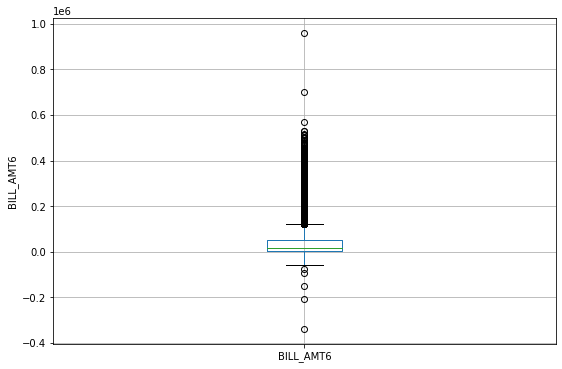

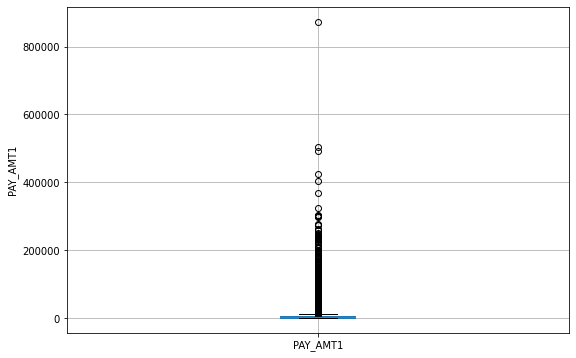

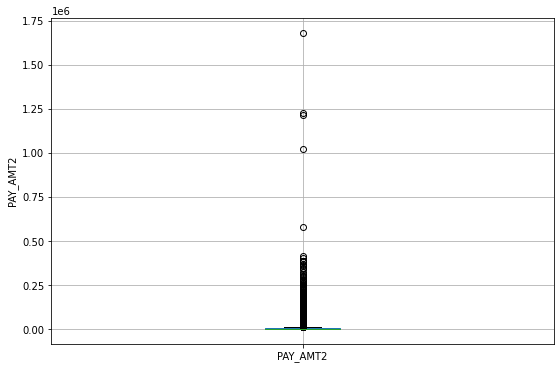

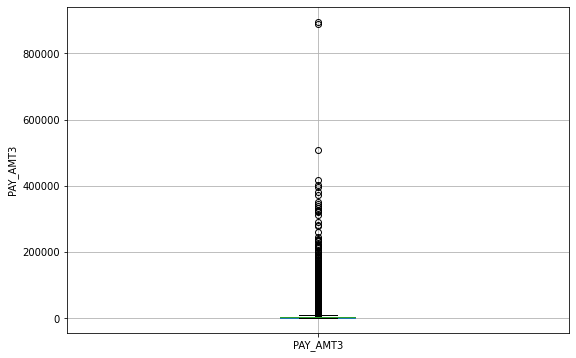

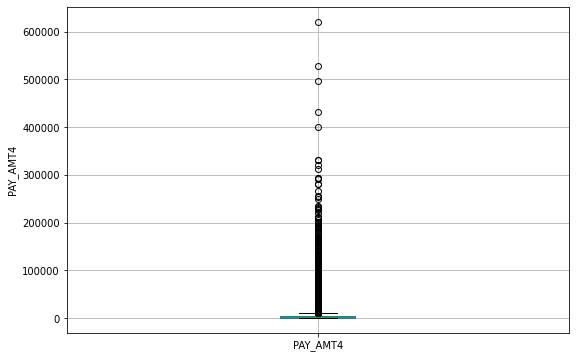

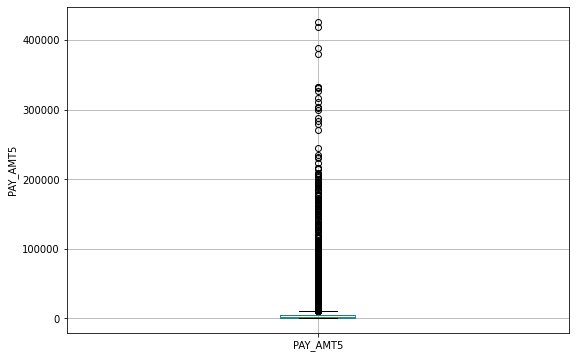

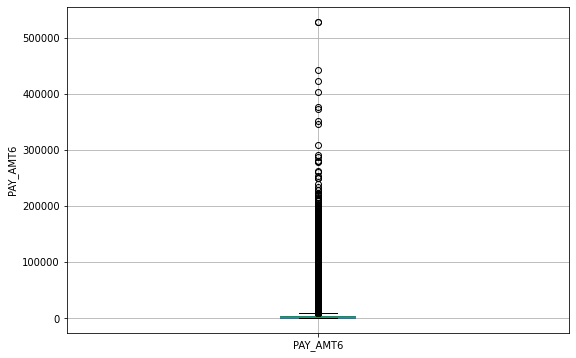

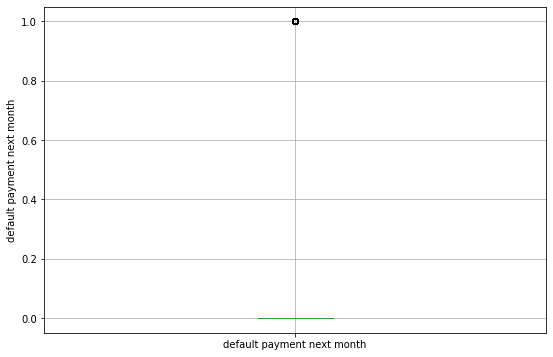

In [13]:
# plot a boxplot for the label by each feature
for col in df.columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.show()

So, here we can see some outliers but we will not be treating these outliers due to a low amount of data we have been given. So let's just look at what we have in our dataset and plot the mean and median of all features using a histogram.

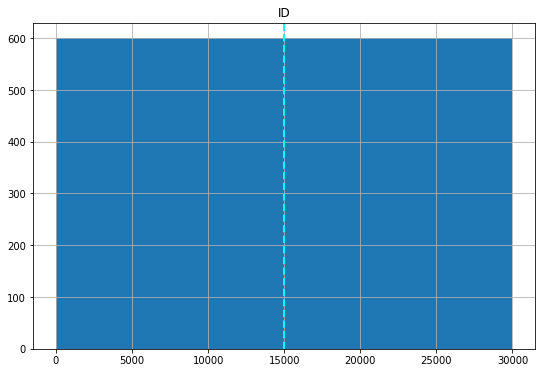

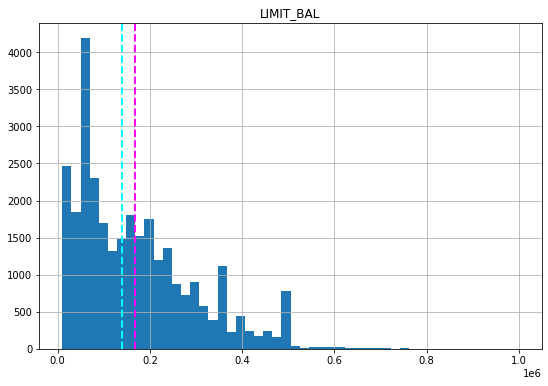

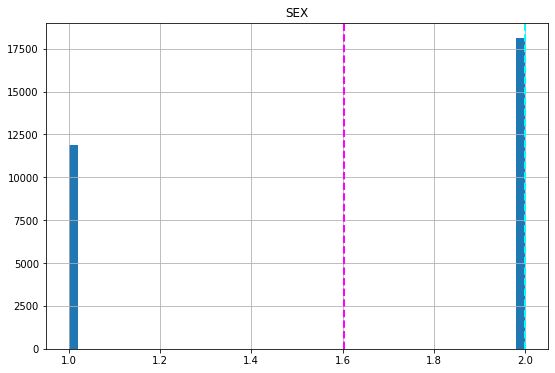

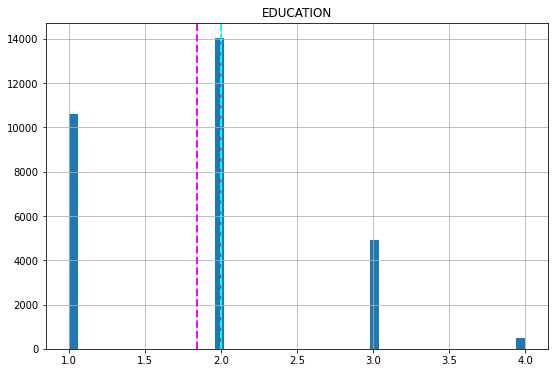

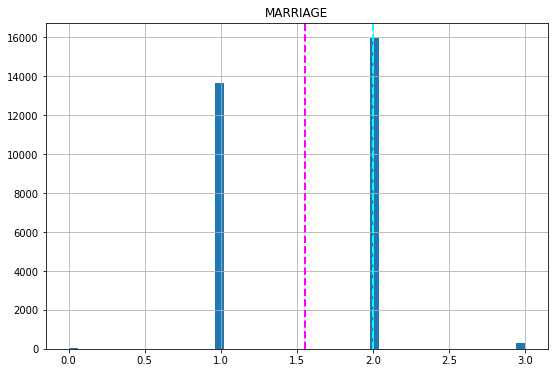

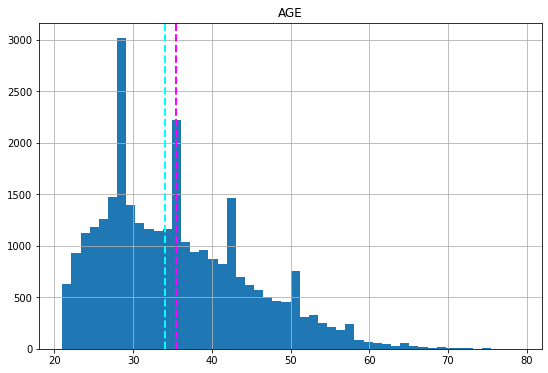

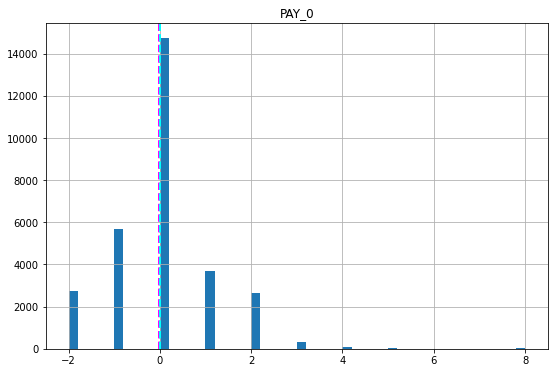

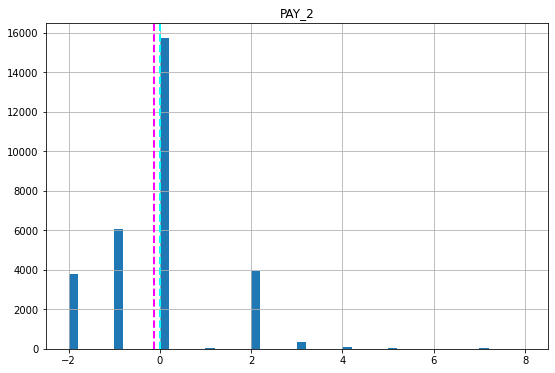

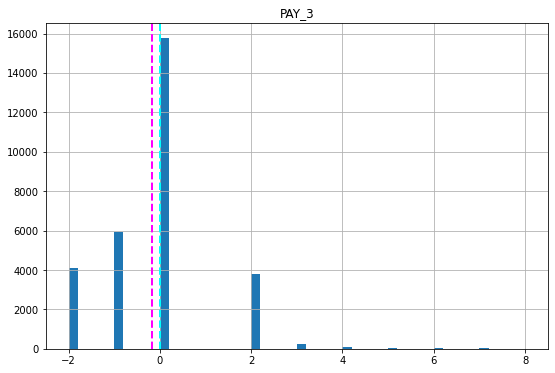

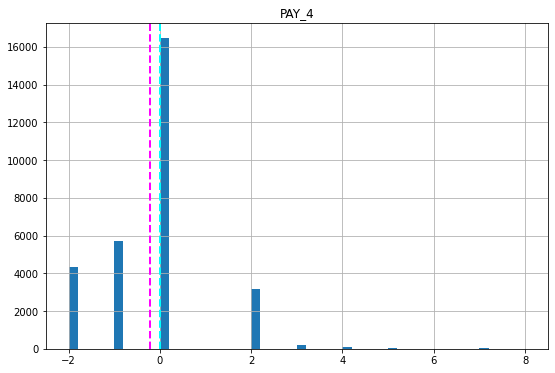

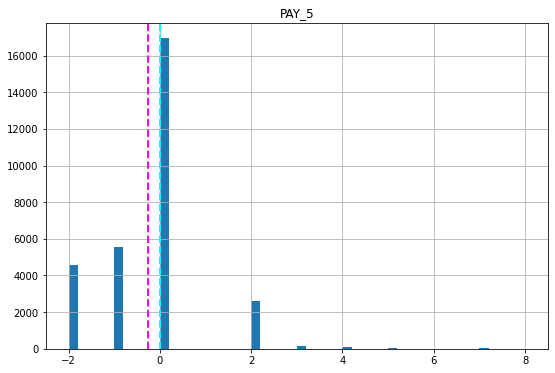

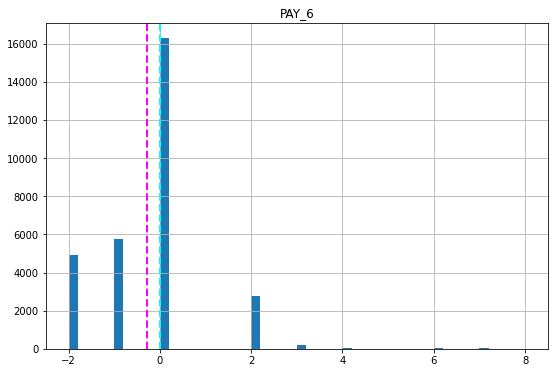

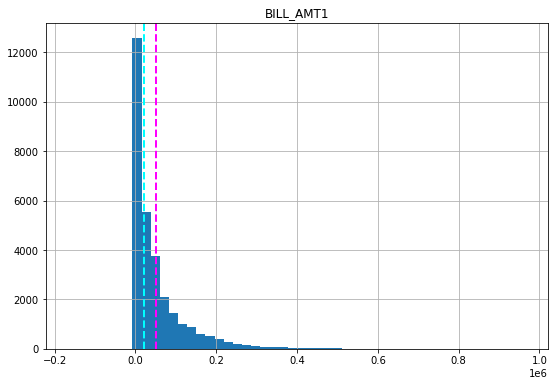

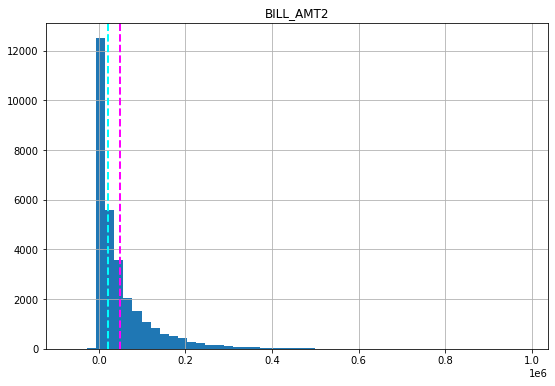

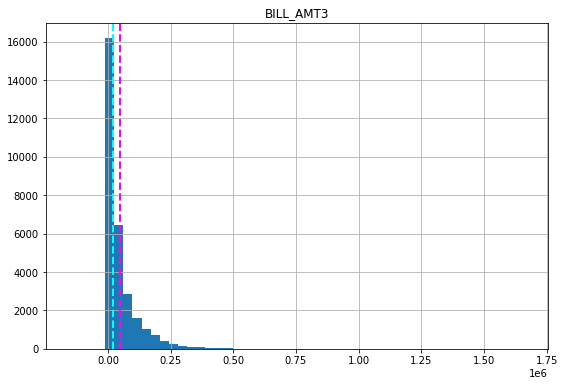

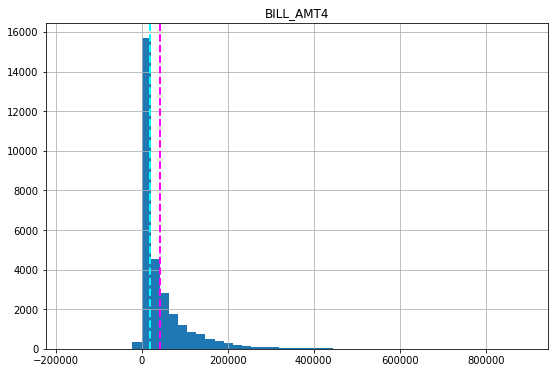

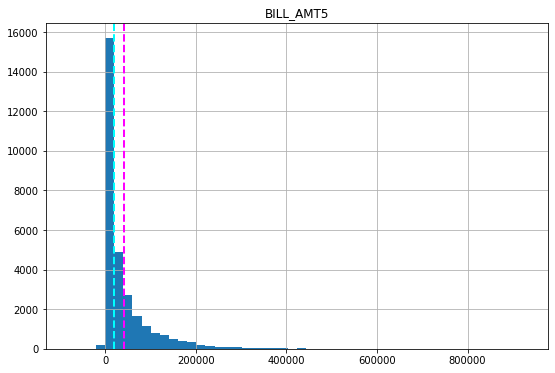

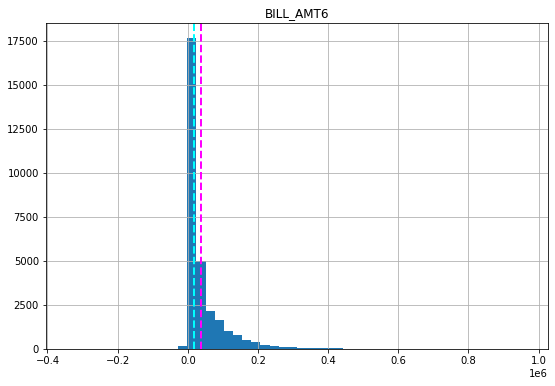

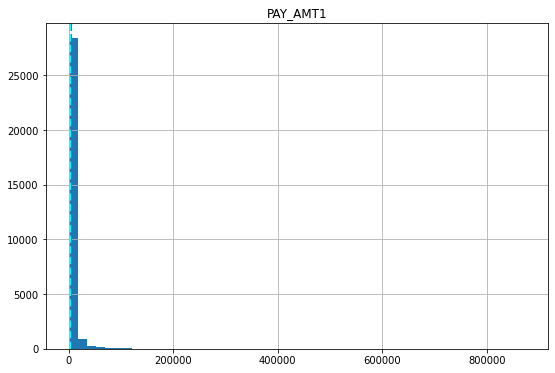

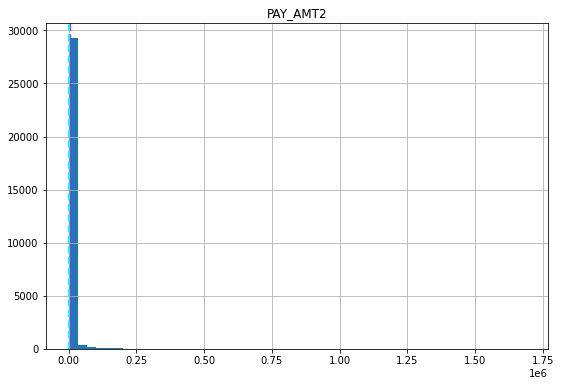

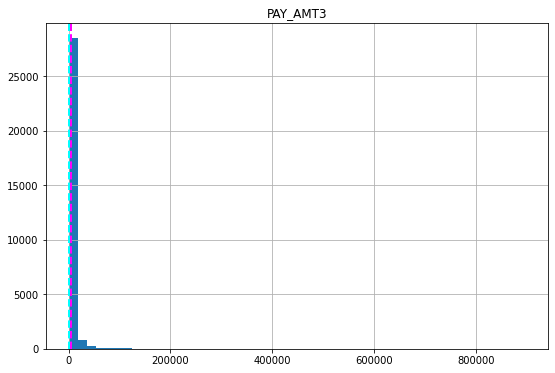

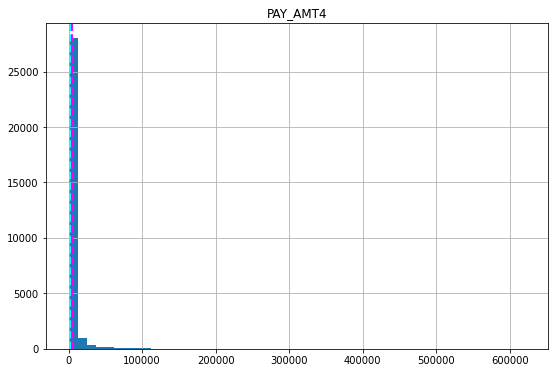

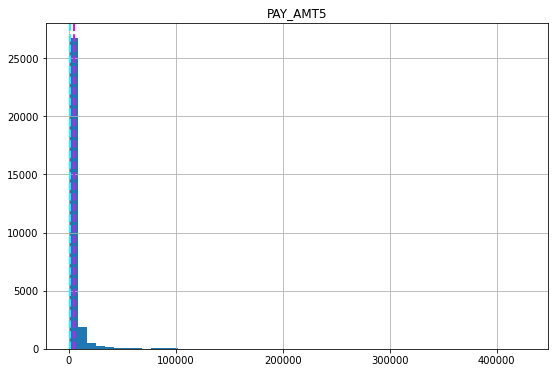

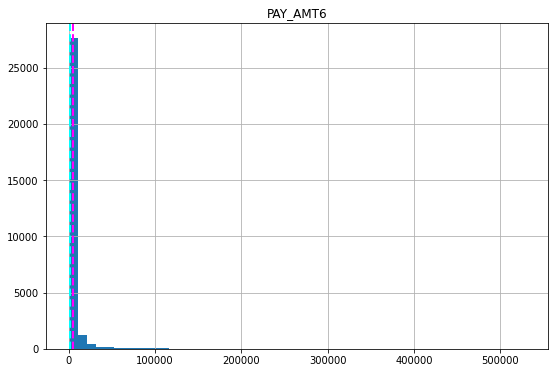

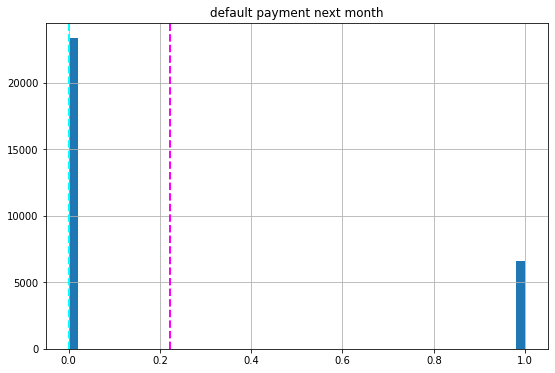

In [14]:
# plot a bar plot for each feature count
for col in df.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

So here we see the data is almost normally distributed and without further working on them we will start some feature engineering to 

##Feature Engineering

In [15]:
df['Total_Bill']=df['BILL_AMT1']	+df['BILL_AMT2']+df['BILL_AMT3']	+df['BILL_AMT4']	+df['BILL_AMT5']	+df['BILL_AMT6']

In [16]:
df['Total_Bill']

0          7704
1         17077
2        101653
3        231334
4        109339
          ...  
29995    725349
29996     21182
29997     70496
29998    266611
29999    230874
Name: Total_Bill, Length: 30000, dtype: int64

In [17]:
df['Total_Paid']=df['PAY_AMT1']	+df['PAY_AMT2']+df['PAY_AMT3']	+df['PAY_AMT4']	+df['PAY_AMT5']	+df['PAY_AMT6']

In [18]:
df['Total_Paid']

0           689
1          5000
2         11018
3          8388
4         59049
          ...  
29995     42550
29996     14490
29997     31300
29998    147181
29999      8308
Name: Total_Paid, Length: 30000, dtype: int64

In [19]:
df['Payment_Left']=df['Total_Bill']-df['Total_Paid']

In [20]:
df[['LIMIT_BAL','Total_Bill','Total_Paid','Payment_Left','default payment next month']]

,LIMIT_BAL,Total_Bill,Total_Paid,Payment_Left,default payment next month
0,20000,7704,689,7015,1
1,120000,17077,5000,12077,1
2,90000,101653,11018,90635,0
3,50000,231334,8388,222946,0
4,50000,109339,59049,50290,0
...,...,...,...,...,...
29995,220000,725349,42550,682799,0
29996,150000,21182,14490,6692,0
29997,30000,70496,31300,39196,1
29998,80000,266611,147181,119430,1


In [21]:
df[df['Total_Bill']<df['Total_Paid']][['Total_Bill','Total_Paid','default payment next month']]

,Total_Bill,Total_Paid,default payment next month
26,-394,2500,1
33,125744,158502,0
37,32279,53349,0
67,8589,9198,0
68,7901,41379,0
...,...,...,...
29923,13297,13305,0
29942,11688,12615,1
29962,7564,7828,0
29983,21242,21288,0


In [22]:
df[df['Payment_Left']<0]['Payment_Left'].count()

3202

##Onehot Encoding

In [23]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Total_Bill', 'Total_Paid',
       'Payment_Left'],
      dtype='object')

In [24]:
# One-hot encoding
final_df=df.copy()
final_df = pd.get_dummies(final_df, columns=["SEX"])
final_df = pd.get_dummies(final_df, columns=["EDUCATION"])
final_df = pd.get_dummies(final_df, columns=["MARRIAGE"])


In [25]:
final_df.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill,Total_Paid,Payment_Left,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689,7015,0,1,0,1,0,0,0,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,5000,12077,0,1,0,1,0,0,0,0,1,0
2,3,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653,11018,90635,0,1,0,1,0,0,0,0,1,0
3,4,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334,8388,222946,0,1,0,1,0,0,0,1,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339,59049,50290,1,0,0,1,0,0,0,1,0,0


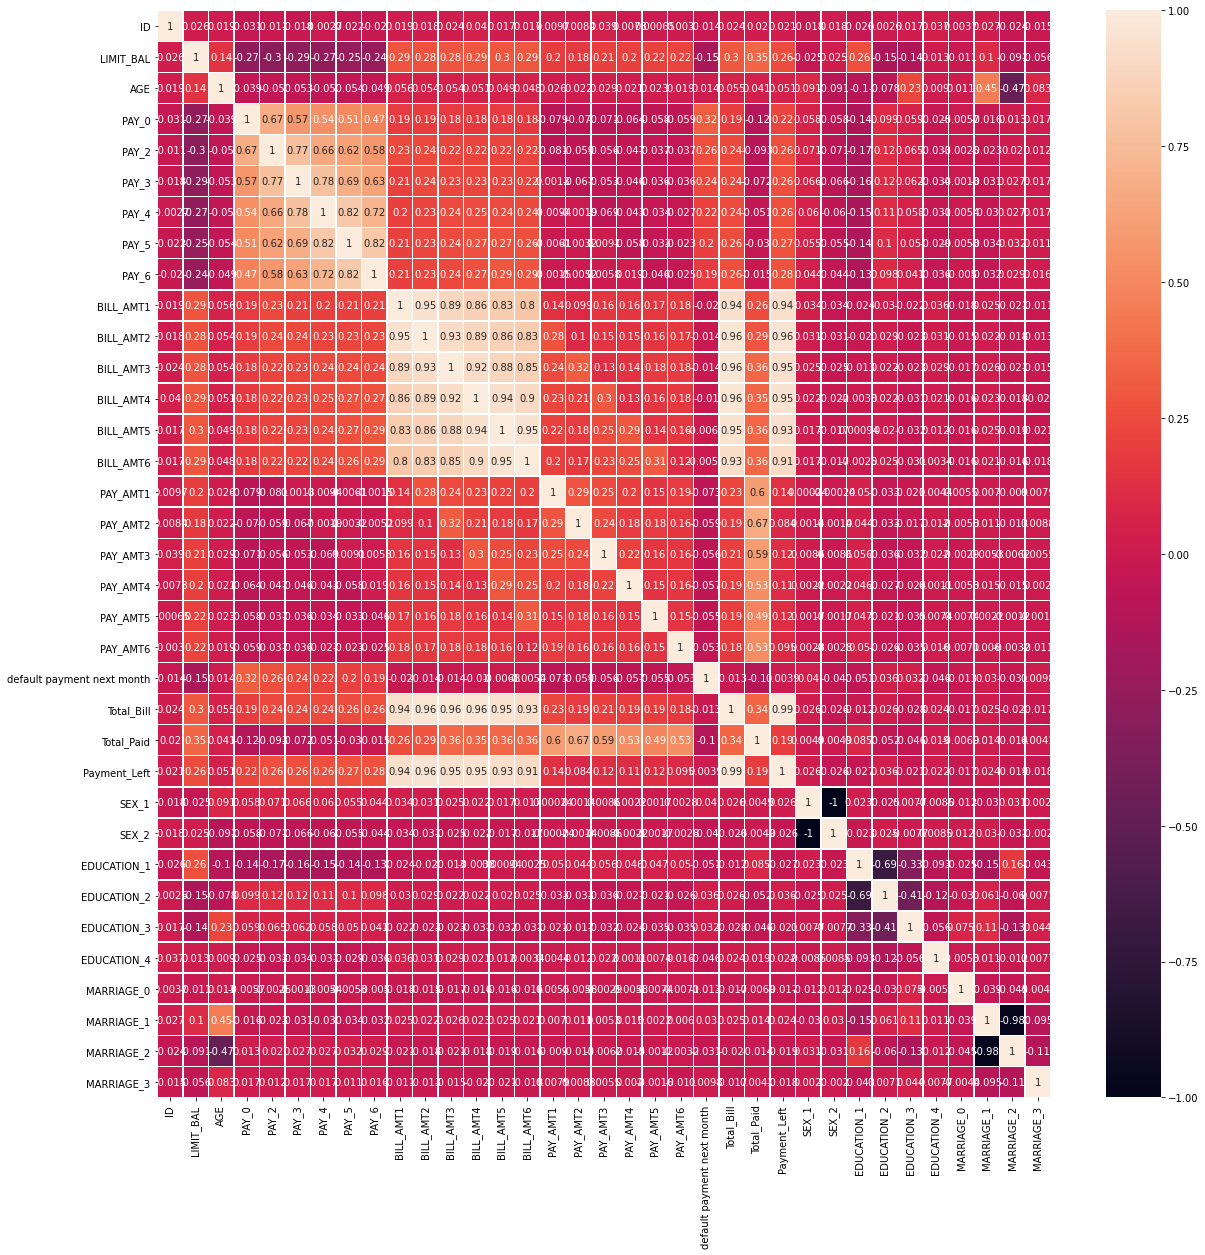

In [26]:
plt.figure (figsize= (20,20))
sns.heatmap(final_df.corr(),linewidths=.5,annot=True)

In [27]:
# 'BILL_AMT2'	,'BILL_AMT3'	,'BILL_AMT4'	,'BILL_AMT5'	,'BILL_AMT6'
del final_df['BILL_AMT1']
del final_df['BILL_AMT2']
del final_df['BILL_AMT3']
del final_df['BILL_AMT4']
del final_df['BILL_AMT5']
del final_df['BILL_AMT6']
del final_df['PAY_AMT1']
del final_df['PAY_AMT2']
del final_df['PAY_AMT3']
del final_df['PAY_AMT4']
del final_df['PAY_AMT5']
del final_df['PAY_AMT6']

In [28]:
final_df

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,Total_Bill,Total_Paid,Payment_Left,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,24,2,2,-1,-1,-2,-2,1,7704,689,7015,0,1,0,1,0,0,0,1,0,0
1,2,120000,26,-1,2,0,0,0,2,1,17077,5000,12077,0,1,0,1,0,0,0,0,1,0
2,3,90000,34,0,0,0,0,0,0,0,101653,11018,90635,0,1,0,1,0,0,0,0,1,0
3,4,50000,37,0,0,0,0,0,0,0,231334,8388,222946,0,1,0,1,0,0,0,1,0,0
4,5,50000,57,-1,0,-1,0,0,0,0,109339,59049,50290,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39,0,0,0,0,0,0,0,725349,42550,682799,1,0,0,0,1,0,0,1,0,0
29996,29997,150000,43,-1,-1,-1,-1,0,0,0,21182,14490,6692,1,0,0,0,1,0,0,0,1,0
29997,29998,30000,37,4,3,2,-1,0,0,1,70496,31300,39196,1,0,0,1,0,0,0,0,1,0
29998,29999,80000,41,1,-1,0,0,0,-1,1,266611,147181,119430,1,0,0,0,1,0,0,1,0,0


In [29]:
X = final_df.drop('default payment next month',axis=1)
y = final_df['default payment next month']

In [31]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.3, random_state = 42) 
print(X_train.shape)
print(X_test.shape)

(21000, 22)
(9000, 22)


In [32]:
y_train.value_counts()

0    16324
1     4676
Name: default payment next month, dtype: int64

In [33]:
y_test.value_counts()

0    7040
1    1960
Name: default payment next month, dtype: int64

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
clf.coef_

array([[-2.73786131e-05, -4.26788419e-06, -6.80218111e-08,
         6.48371843e-09,  5.20610158e-09,  4.62932806e-09,
         4.29733056e-09,  4.01955878e-09,  3.86859158e-09,
        -2.85990157e-06, -6.21482754e-06,  3.35492597e-06,
        -5.28046558e-10, -1.74144332e-09, -5.24038551e-10,
        -1.10622100e-09, -4.85507435e-10, -1.53722891e-10,
        -1.71670716e-11, -3.20904645e-10, -1.88841057e-09,
        -4.30075878e-11]])

In [36]:
clf.intercept_

array([-2.26948987e-09])

In [37]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7773333333333333
The accuracy on test data is  0.7822222222222223


*** Train Accuracy *** 0.7773333333333333


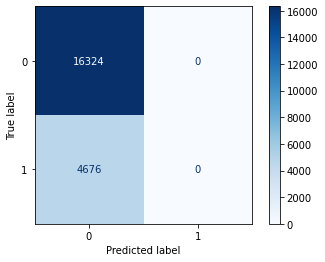

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('*** Train Accuracy ***',clf.score(X_train,y_train))
disp = plot_confusion_matrix(clf, X_train, y_train,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                             values_format='g'
                            )

*** Test Accuracy *** 0.7822222222222223


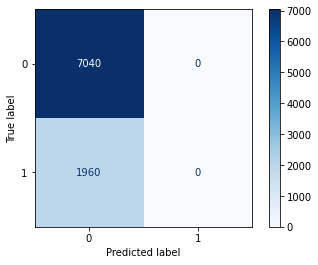

In [41]:
print('*** Test Accuracy ***',clf.score(X_test,y_test))
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                             values_format='g'
                            )

# SMOTE

In [42]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (21000, 22)
Number transactions y_train dataset:  (21000,)
Number transactions X_test dataset:  (9000, 22)
Number transactions y_test dataset:  (9000,)


In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 4676
Before OverSampling, counts of label '0': 16324 

After OverSampling, the shape of train_X: (32648, 22)
After OverSampling, the shape of train_y: (32648,) 

After OverSampling, counts of label '1': 16324
After OverSampling, counts of label '0': 16324


In [45]:
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Get the predicted classes
train_class_preds = clf.predict(X_train_res)
test_class_preds = clf.predict(X_test)

In [47]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train_res)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6013844645920118
The accuracy on test data is  0.5881111111111111


*** Train Accuracy *** 0.6013844645920118


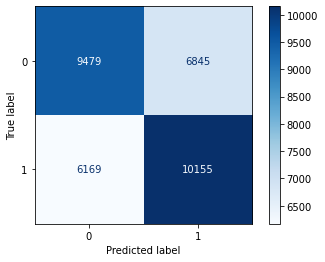

In [48]:
print('*** Train Accuracy ***',clf.score(X_train_res,y_train_res))
disp = plot_confusion_matrix(clf, X_train_res, y_train_res,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                             values_format='g'
                            )

In [51]:
print(classification_report(y_test, test_class_preds,target_names=['class_0','class_1']))

              precision    recall  f1-score   support

     class_0       0.84      0.58      0.69      7040
     class_1       0.29      0.61      0.39      1960

    accuracy                           0.59      9000
   macro avg       0.57      0.59      0.54      9000
weighted avg       0.72      0.59      0.62      9000



# Naive Bayes

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)

In [54]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB().fit(X_train,y_train)

In [55]:
train_preds = naive_model.predict(X_train)
test_preds = naive_model.predict(X_test)

In [56]:
# Confusion matrices for train and test 

print(confusion_matrix(y_train,train_preds))
print(confusion_matrix(y_test,test_preds))

[[18748     0]
 [ 5252     0]]
[[4616    0]
 [1384    0]]


*** Train Accuracy *** 0.7811666666666667


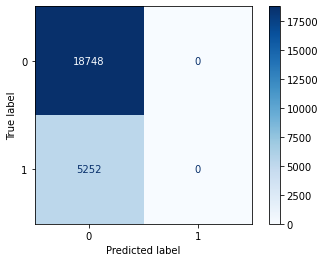

In [57]:
print('*** Train Accuracy ***',naive_model.score(X_train,y_train))
disp = plot_confusion_matrix(naive_model, X_train, y_train,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                             values_format='g'
                            )

*** Test Accuracy *** 0.7693333333333333


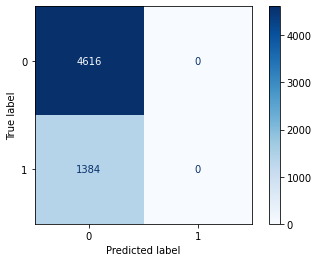

In [58]:
print('*** Test Accuracy ***',naive_model.score(X_test,y_test))
disp = plot_confusion_matrix(naive_model, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                             values_format='g'
                            )

In [59]:
from sklearn.metrics import classification_report

In [60]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7811666666666667
The accuracy on test data is  0.7693333333333333


In [61]:
# Print the classification report for train and test
print(classification_report(y_train,train_preds))
print("\n")
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     18748
           1       0.00      0.00      0.00      5252

    accuracy                           0.78     24000
   macro avg       0.39      0.50      0.44     24000
weighted avg       0.61      0.78      0.69     24000



              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4616
           1       0.00      0.00      0.00      1384

    accuracy                           0.77      6000
   macro avg       0.38      0.50      0.43      6000
weighted avg       0.59      0.77      0.67      6000



#K-Nearest Neighbors

In [64]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

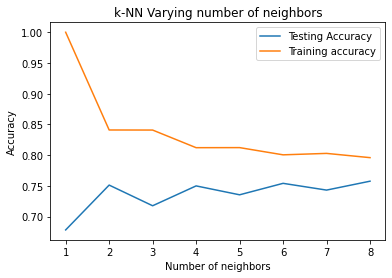

In [65]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [66]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=8)

In [67]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [68]:
knn.score(X_test,y_test)

0.7575

In [69]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [70]:
confusion_matrix(y_test,y_pred)

array([[4455,  161],
       [1294,   90]])

In [71]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

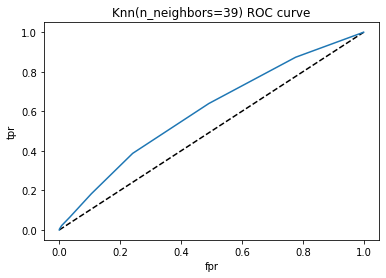

In [73]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=39) ROC curve')
plt.show()

In [74]:
# Area under ROC curve
roc_auc_score(y_test,y_pred_proba)

0.6022816779535368

##Cross Validation

In [75]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [76]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
knn_cv.best_score_

0.7784666666666668

In [78]:
knn_cv.best_params_

{'n_neighbors': 44}

In [79]:
error_rate=[]
knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)
error_rate.append(np.mean(pred_i != y_test))

In [80]:
error_rate

[0.23233333333333334]